In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

In [3]:
orders = pd.read_csv('./data/Orders.csv')
returns = pd.read_csv('./data/Returns.csv')

## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [4]:
orders.Profit = orders.Profit.replace('[\$,]', '', regex=True).astype(float)
orders.Sales = orders.Sales.replace('[\$,]', '', regex=True).astype(float)

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [5]:
orders.head(10)
# returns.head(10)
# orders['Order.ID']
orders['Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [6]:
def month_to_season(month):
  if month in [3,4,5]:
    month = 'spring'
  elif month in [6,7,8]:
    month = 'summer'
  elif month in [9,10,11]:
    month = 'fall'
  else:
    month = 'winter'
  return(month)

In [7]:
orders['season'] = orders.Month.apply(month_to_season)

In [8]:
orders.sample(10)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,season
29985,15255,ES-2014-LC1693048-41881,8/30/14,9/3/14,Standard Class,LC-1693048,Linda Cazamias,Corporate,NaN,Neubrandenburg,Mecklenburg-Vorpommern,Germany,Western Europe,Europe,OFF-AR-3466,Office Supplies,Art,"BIC Pens, Fluorescent",62.16,4,0.00,20.40,5.500,Medium,8,summer
11537,47521,EG-2014-AP91538-41807,6/17/14,6/24/14,Standard Class,AP-91538,Arthur Prichep,Consumer,NaN,Cairo,Al Qahirah,Egypt,North Africa,Africa,FUR-FU-4101,Furniture,Furnishings,"Eldon Stacking Tray, Black",189.00,6,0.00,22.68,27.900,Low,6,summer
25875,44658,IZ-2015-JM525061-42235,8/19/15,8/25/15,Standard Class,JM-525061,Janet Martin,Consumer,NaN,Mosul,Ninawa,Iraq,Western Asia,Asia Pacific,FUR-CH-5802,Furniture,Chairs,"SAFCO Steel Folding Chair, Red",171.42,2,0.00,80.52,7.650,Medium,8,summer
46451,39804,CA-2014-SJ20125140-41707,3/9/14,3/13/14,Standard Class,SJ-201251402,Sanjit Jacobs,Home Office,75217.0,Dallas,Texas,United States,Central US,USCA,OFF-EN-6326,Office Supplies,Envelopes,"Tyvek Interoffice Envelopes, 9 1/2"" x 12 1/2"",...",146.35,3,0.20,49.39,6.230,Medium,3,spring
33259,46153,RS-2013-PF9120108-41591,11/13/13,11/15/13,First Class,PF-9120108,Peter Fuller,Consumer,NaN,Makhachkala,Dagestan,Russia,Eastern Europe,Europe,OFF-BI-4804,Office Supplies,Binders,"Ibico 3-Hole Punch, Durable",31.95,1,0.00,11.82,4.180,High,11,fall
1237,34909,CA-2013-AB10255140-41611,12/3/13,12/8/13,Standard Class,AB-102551406,Alejandro Ballentine,Home Office,19134.0,Philadelphia,Pennsylvania,United States,Eastern US,USCA,OFF-PA-5229,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.45,2,0.20,5.55,1.370,Medium,12,winter
36359,28510,ID-2014-SS2059059-41916,10/4/14,10/11/14,Standard Class,SS-2059059,Sonia Sunley,Consumer,NaN,Tasikmalaya,Jawa Barat,Indonesia,Southeastern Asia,Asia Pacific,OFF-LA-5390,Office Supplies,Labels,"Novimex Legal Exhibit Labels, Laser Printer Co...",38.84,7,0.47,-23.53,3.190,Medium,10,fall
38530,9796,MX-2012-TC2098051-41158,9/6/12,9/10/12,Standard Class,TC-2098051,Tamara Chand,Corporate,NaN,Chinautla,Guatemala,Guatemala,Central America,LATAM,OFF-FA-2947,Office Supplies,Fasteners,"Accos Push Pins, 12 Pack",37.20,4,0.00,15.60,2.593,Medium,9,fall
24978,13736,ES-2014-JD16150139-41868,8/17/14,8/20/14,Second Class,JD-16150139,Justin Deggeller,Corporate,NaN,Tamworth,England,United Kingdom,Northern Europe,Europe,OFF-PA-4150,Office Supplies,Paper,"Enermax Computer Printout Paper, Recycled",85.14,3,0.00,4.23,8.230,Critical,8,summer
355,20521,IN-2015-BE114557-42080,3/17/15,3/22/15,Second Class,BE-114557,Brad Eason,Home Office,NaN,Sydney,New South Wales,Australia,Oceania,Asia Pacific,TEC-CO-4568,Technology,Copiers,"Hewlett Copy Machine, Color",3299.56,14,0.10,366.28,336.020,Medium,3,spring


In [9]:
season_category = orders.groupby(['season','Category']).agg({'Row.ID':'count', 'Profit':'sum'})

In [10]:
season_category = season_category.reset_index()

In [11]:
# season_category = season_category.set_index('season')
season_category

,season,Category,Row.ID,Profit
0,fall,Furniture,3347,113388.94
1,fall,Office Supplies,10170,163654.58
2,fall,Technology,3308,227549.67
3,spring,Furniture,1856,41635.46
4,spring,Office Supplies,6054,104256.93
5,spring,Technology,1916,126773.70
6,summer,Furniture,2488,63350.29
7,summer,Office Supplies,8381,136797.00
8,summer,Technology,2693,175576.04
9,winter,Furniture,2169,66707.93


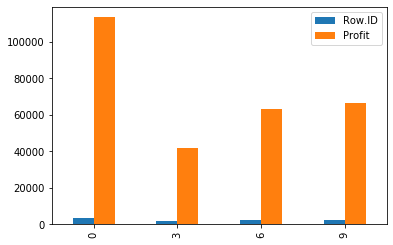

In [12]:
season_category[season_category.Category =='Furniture'].plot.bar()

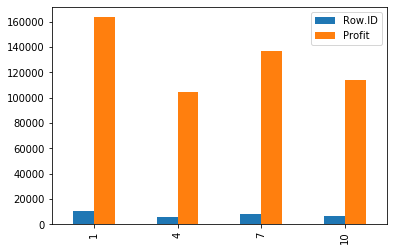

In [13]:
season_category[season_category.Category =='Office Supplies'].plot.bar()

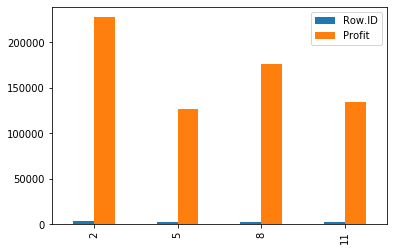

In [14]:
season_category[season_category.Category =='Technology'].plot.bar()

In [15]:
net         = 2500000
annual_gain = 1.05
cost        = 100000

def update_net(net,annual_gain,cost):
    net=(net*annual_gain-cost)*.98
    return net

for i in range(40):
    net = update_net(net, annual_gain, cost)
    
print(net)

# update_net(net, gain_percentage, cost)

620275.5783964071


Furniture category had a slight drop in sales in spring and summer, but overall all categories followed a similar trend from overall (Winter < Spring < Summer < Fall)

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [16]:
orders_returns = orders.merge(returns, how='left' , left_on= 'Order.ID', right_on = 'Order ID')
orders_returns['Year'] = pd.DatetimeIndex(orders_returns['Order.Date']).year

In [17]:
# 1 How much profit did we lose due to returns each year?
orders_returns[orders_returns.Returned =='Yes'].groupby('Year').agg({'Profit':'sum'})

,Profit
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [18]:
# 2. How many customer returned more than once? more than 5 times?
customers = orders_returns[orders_returns.Returned =='Yes'].groupby('Customer.ID').agg({'Order.ID':'count'})
print('customers who returned more than once: ',sum(customers['Order.ID']>1))
print('customers who returned more than 5 times: ',sum(customers['Order.ID']>5))

customers who returned more than once:  547
customers who returned more than 5 times:  46


In [41]:
# 3. Which regions are more likely to return orders?
orders_returns['Returned'].fillna('No', inplace=True)
orders_returns['Returned'] = orders_returns['Returned'].map({'Yes': 1, 'No':0})
# regions_returned = orders_returns.groupby('Region_x').agg({'Returned':'count'})
# regions_total = orders_returns.groupby('Region_x').agg({'Order.ID':'count'})

In [42]:
# orders_returns.returns = orders_returns['Returned'].fillna(0)
orders_returns
# orders_returns['Returned'].fillna(0)

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,season,Returned,Order ID,Region_y,Year
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,11,fall,0,NaN,NaN,2014
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,2,winter,0,NaN,NaN,2014
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,10,fall,0,NaN,NaN,2014
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,1,winter,0,NaN,NaN,2014
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,11,fall,0,NaN,NaN,2014
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,Australia,Oceania,Asia Pacific,TEC-PH-5842,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.10,763.28,897.350,Critical,6,summer,0,NaN,NaN,2014
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,New Zealand,Oceania,Asia Pacific,FUR-CH-5378,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.00,564.84,894.770,Critical,11,fall,0,NaN,NaN,2012
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,Waikato,New Zealand,Oceania,Asia Pacific,FUR-TA-3764,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.00,996.48,878.380,High,4,spring,0,NaN,NaN,2013
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,FUR-BO-5957,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.00,54.71,25.270,High,11,fall,0,NaN,NaN,2014
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,Washington,United States,Western US,USCA,FUR-CH-4421,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",48.71,1,0.20,5.48,11.130,High,3,spring,0,NaN,NaN,2012


In [32]:
orders_returns['Returned'].replace(np.nan, 0)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
        ... 
51240    0.0
51241    0.0
51242    0.0
51243    0.0
51244    0.0
51245    0.0
51246    0.0
51247    0.0
51248    0.0
51249    0.0
51250    0.0
51251    0.0
51252    0.0
51253    0.0
51254    0.0
51255    0.0
51256    0.0
51257    0.0
51258    0.0
51259    0.0
51260    0.0
51261    0.0
51262    0.0
51263    0.0
51264    0.0
51265    0.0

In [29]:
orders_returns.groupby('Region_x').agg({'Returned':'mean'})

,Returned
Region_x,
Canada,NaN
Caribbean,NaN
Central Africa,NaN
Central America,NaN
Central Asia,NaN
Central US,NaN
Eastern Africa,NaN
Eastern Asia,NaN
Eastern Europe,NaN


In [233]:
regions = regions_returned.merge(regions_total, on = 'Region_x')

In [235]:
regions['ratio'] = regions.Returned/regions['Order.ID']

In [241]:
regions.sort_values('ratio')

,Returned,Order.ID,ratio
Region_x,,,
Eastern Africa,18,728,0.024725
Central Africa,17,643,0.026439
Eastern Europe,42,1529,0.027469
Central US,74,2323,0.031855
Northern Europe,76,2204,0.034483
Canada,15,384,0.039062
Western Europe,233,5883,0.039606
North Africa,51,1278,0.039906
Caribbean,69,1690,0.040828


In [245]:
# 4. Which categories (sub-categories) of products are more likely to be returned?
orders_returns

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region_x,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,season,Returned,Order ID,Region_y,Year
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,11,fall,NaN,NaN,NaN,2014
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2,winter,NaN,NaN,NaN,2014
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,10,fall,NaN,NaN,NaN,2014
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,1,winter,NaN,NaN,NaN,2014
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,11,fall,NaN,NaN,NaN,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,Japan,Eastern Asia,Asia Pacific,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,6,summer,NaN,NaN,NaN,2015
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,United States,Southern US,USCA,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,5,spring,NaN,NaN,NaN,2014
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,United States,Western US,USCA,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,8,summer,NaN,NaN,NaN,2012
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,São Paulo,Brazil,South America,LATAM,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2,winter,NaN,NaN,NaN,2013
